# Unpaired two-sample t-test

## Libraries and settings

In [1]:
# Libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Settings for seaborn
sns.set_theme(style="ticks", palette="pastel")

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Show current working directory
print(os.getcwd())

/workspaces/data_analytics/Week_06


## Read example data (used car data)

In [2]:
df = pd.read_excel('t-tests_and_ANOVA.xlsx', sheet_name='t-test_data')

# Show categories of 'Make'
print(df['Make'].value_counts())

# Show first rows in dataframe
df.head()

Make
VW     20
BMW    20
Name: count, dtype: int64


,Make,Price
0,VW,29000
1,VW,38000
2,VW,33000
3,VW,64000
4,VW,52000


## Create grouped boxplot (groups = make, values = car prices)

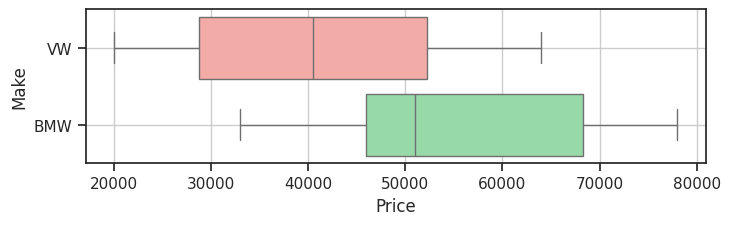

In [3]:
# Plot boxplot with groups
plt.figure(figsize=(8,2))
ax = sns.boxplot(x="Price",
                 y="Make",
                 palette=['r', 'g'],
                 data=df,
                 orient='h')
plt.grid()
plt.show()

## Unpaired two-sample t-test

In [4]:
# Create subsets (groups)
vw = df.loc[df['Make'] == 'VW']
bmw = df.loc[df['Make'] == 'BMW']

# Create t-test
result = stats.ttest_ind(vw['Price'], bmw['Price'])

# Print result
print('Test-statistic:', result[0].round(5), 'p-value',  result[1].round(5))

Test-statistic: -2.69607 p-value 0.0104


## Interpretation of result

<p> Because the p-value is lower than 0.05, the null hypothesis can be rejected, i.e. there is evidence that the used car prices of VW, BMW differ. Note that, from the t-test above, it is not clear which brand show higher or lower prices. It only shows that there is a statistically significant (5% significance level) difference between prices.</p>

## Importing apartment data

In [5]:
# Read the data to a pandas data frame
df = pd.read_csv('apartments_data_enriched_cleaned.csv', 
                 sep=';', 
                 encoding='utf-8')[['web-scraper-order',
                                    'address_raw',
                                    'lat',
                                    'lon',
                                    'bfs_number',
                                    'bfs_name',
                                    'rooms', 
                                    'area', 
                                    'luxurious', 
                                    'price', 
                                    'price_per_m2',
                                    'pop_dens',
                                    'frg_pct',
                                    'mean_taxable_income',
                                    'dist_supermarket']]

# Get number of rows and columns
print(df.shape)

# Show first records
df.head(5)

(774, 15)


,web-scraper-order,address_raw,lat,lon,bfs_number,bfs_name,rooms,area,luxurious,price,price_per_m2,pop_dens,frg_pct,mean_taxable_income,dist_supermarket
0,1693998201-1,"Neuhusstrasse 6, 8630 Rüti ZH, ZH",47.252171,8.845797,118,Rüti (ZH),3.0,49,0,1441,29.41,1221.272366,24.841283,65362.04268,645.652248
1,1693998233-172,"Widacherstrasse 5, 8630 Rüti ZH, ZH",47.252087,8.854919,118,Rüti (ZH),3.0,111,0,2600,23.42,1221.272366,24.841283,65362.04268,265.102153
2,1693998256-331,"Widenweg 14, 8630 Rüti ZH, ZH",47.253670,8.853993,118,Rüti (ZH),3.0,58,0,1490,25.69,1221.272366,24.841283,65362.04268,94.401821
3,1693998265-381,"Rain 1, 8630 Rüti ZH, ZH",47.259834,8.851705,118,Rüti (ZH),4.0,118,0,3240,27.46,1221.272366,24.841283,65362.04268,106.660970
4,1693998276-419,"Bachtelstrasse 24b, 8630 Rüti ZH, ZH",47.266113,8.866872,118,Rüti (ZH),3.0,66,0,1450,21.97,1221.272366,24.841283,65362.04268,974.844209


## Create new binary variable with densely populated and all other municipalities

In [6]:
df['pop_dens_binary'] = (df['pop_dens'] >= 1000).astype(int)
df.head(5)

,web-scraper-order,address_raw,lat,lon,bfs_number,bfs_name,rooms,area,luxurious,price,price_per_m2,pop_dens,frg_pct,mean_taxable_income,dist_supermarket,pop_dens_binary
0,1693998201-1,"Neuhusstrasse 6, 8630 Rüti ZH, ZH",47.252171,8.845797,118,Rüti (ZH),3.0,49,0,1441,29.41,1221.272366,24.841283,65362.04268,645.652248,1
1,1693998233-172,"Widacherstrasse 5, 8630 Rüti ZH, ZH",47.252087,8.854919,118,Rüti (ZH),3.0,111,0,2600,23.42,1221.272366,24.841283,65362.04268,265.102153,1
2,1693998256-331,"Widenweg 14, 8630 Rüti ZH, ZH",47.253670,8.853993,118,Rüti (ZH),3.0,58,0,1490,25.69,1221.272366,24.841283,65362.04268,94.401821,1
3,1693998265-381,"Rain 1, 8630 Rüti ZH, ZH",47.259834,8.851705,118,Rüti (ZH),4.0,118,0,3240,27.46,1221.272366,24.841283,65362.04268,106.660970,1
4,1693998276-419,"Bachtelstrasse 24b, 8630 Rüti ZH, ZH",47.266113,8.866872,118,Rüti (ZH),3.0,66,0,1450,21.97,1221.272366,24.841283,65362.04268,974.844209,1


## Create pivot table with mean price_per_m2

In [7]:
# Using pivot_table to reshape the data and calculate means 
pd.pivot_table(df[['pop_dens_binary', 'price_per_m2']],
               index=['pop_dens_binary'],
               values=['price_per_m2'],
               aggfunc=[np.mean, 'count'])

,mean,count
,price_per_m2,price_per_m2
pop_dens_binary,,
0,24.367444,180
1,35.430657,594


## Create grouped boxplot (groups = pop_dens_binary, values = prices_per_m2)

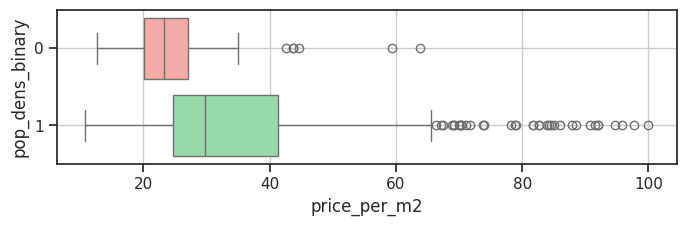

In [8]:
# Plot boxplot with groups
plt.figure(figsize=(8,2))
ax = sns.boxplot(x="price_per_m2",
                 y="pop_dens_binary",
                 data=df,
                 palette=['r', 'g'],
                 orient='h')
plt.grid()
plt.show()

## Unpaired two-sample t-test

In [9]:
# Create subsets (groups)
densely_populated = df.loc[df['pop_dens_binary'] == 0]
not_densely_populated = df.loc[df['pop_dens_binary'] == 1]

# Create t-test
result = stats.ttest_ind(densely_populated['price_per_m2'], 
                         not_densely_populated['price_per_m2'])

# Print result
print('Test-statistic:', result[0].round(5), 'p-value',  result[1].round(5))

Test-statistic: -9.19477 p-value 0.0


## Interpretation of result

## Compare rental apartment prices in the cities of Winterthur and Zuerich

### Create subsets for Winterthur and Zurich

In [11]:
# Create subsets for Winterthur and Zurich
df_winti = df.loc[df['bfs_name'] == 'Winterthur']['price_per_m2']
df_zueri = df.loc[df['bfs_name'] == 'Zürich']['price_per_m2']

# Show descriptive statistics
print('Winterthur:')
print(df_winti.describe())
print('\nZürich:')
print(df_zueri.describe())

Winterthur:
count    94.000000
mean     26.251170
std       8.372649
min      14.910000
25%      22.307500
50%      24.685000
75%      27.987500
max      71.670000
Name: price_per_m2, dtype: float64

Zürich:
count    255.000000
mean      46.003961
std       17.000007
min       19.440000
25%       34.380000
50%       41.380000
75%       51.955000
max      100.000000
Name: price_per_m2, dtype: float64


### Create grouped boxplot (Winterthur vs. Zurich)

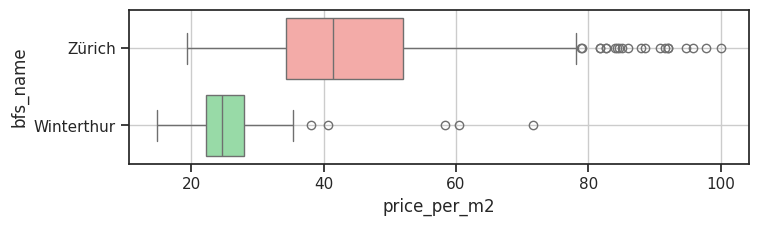

In [12]:
# Filter data for Winterthur and Zurich
df_cities = df[df['bfs_name'].isin(['Winterthur', 'Zürich'])]

# Plot boxplot with groups
plt.figure(figsize=(8,2))
ax = sns.boxplot(x="price_per_m2",
                 y="bfs_name",
                 data=df_cities,
                 palette=['r', 'g'],
                 orient='h')
plt.grid()
plt.show()

### Unpaired two-sample t-test (Winterthur vs. Zurich)

In [13]:
# Perform unpaired two-sample t-test
result = stats.ttest_ind(df_winti, df_zueri)

# Print result
print('Unpaired two-sample t-test (Winterthur vs. Zürich)')
print('=' * 50)
print(f'Test-statistic: {result[0]:.5f}')
print(f'p-value: {result[1]:.5f}')
print(f'\nSignificance level: α = 0.05')
print(f'Decision: {"Reject H0" if result[1] < 0.05 else "Fail to reject H0"}')

Unpaired two-sample t-test (Winterthur vs. Zürich)
Test-statistic: -10.78628
p-value: 0.00000

Significance level: α = 0.05
Decision: Reject H0


### Interpretation of result

**Hypotheses:**
- **H0 (Null hypothesis):** There is no difference in the mean prices per m² between rental apartments in Winterthur and Zürich (μ_Winterthur = μ_Zürich)
- **H1 (Alternative hypothesis):** There is a difference in the mean prices per m² between rental apartments in Winterthur and Zürich (μ_Winterthur ≠ μ_Zürich)

**Test results:**
Based on the unpaired two-sample t-test at a significance level of α = 0.05, we can draw the following conclusions:

- If **p-value < 0.05**: We reject the null hypothesis. There is statistically significant evidence that the rental apartment prices per m² differ between Winterthur and Zürich.

- If **p-value ≥ 0.05**: We fail to reject the null hypothesis. There is insufficient evidence to conclude that the rental apartment prices per m² differ significantly between the two cities.

**Important notes:**
- The t-test only tells us whether there is a significant difference, but not which city has higher or lower prices. For that, we need to examine the descriptive statistics (means).
- The test assumes that both samples come from approximately normally distributed populations and have similar variances (or we use Welch's t-test for unequal variances).
- Practical significance should also be considered alongside statistical significance.

<p> Because the p-value is lower than 0.05, the null hypothesis can be rejected, i.e. there is evidence that the prices per m2 differ between densely populated and other municipalities. Note that, from the t-test above, it is not clear which group of municipalities show lower or higher prices. It only shows that there is a statistically significant (5% significance level) difference between prices.</p>

### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [10]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.8.0-1030-azure
Datetime: 2025-12-07 16:40:34
Python Version: 3.11.14
-----------------------------------
